In [4]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize

import cv2
import numpy as np


In [6]:
from pathlib import Path
p = Path().cwd()
q = p/"Data"

target_dict = {'can': 0,
               'cardboard': 1,
               'glass bottle': 2,
               'plastic bottle': 3} # create dictionary mapping you data classes/labels to integer labels

images = [] # create an empty list
labels = [] # create an empty list

In [7]:
for fldr in q.iterdir(): 
    current_label = fldr.name # get the name of the current label 
    temp = q/current_label # here we are adding each if the inside folder name to the path so we can go through each of them
    for img in temp.iterdir():
      img = load_img(img) # load image
      img_array = img_to_array(img) # convert the image to an NumPy array 
      img_array_resized = smart_resize(img_array, size = (128,128)) # if necessary, resize the image to 128 by 128 
      images.append(img_array_resized) # add image to list of images 
      labels.append(fldr.name) # add label for this image to the list of labels 

In [8]:
images1 = np.array(images) # convert the list of images to a NumPy array 
labels1 = np.array(labels) # convert the list of labels to a NumPy array
print(images1.shape)
print(labels1.shape)

(5520, 128, 128, 3)
(5520,)


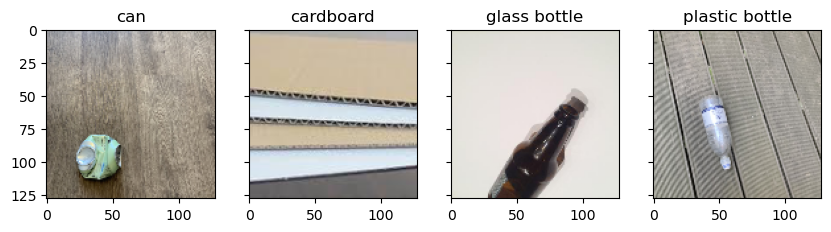

In [11]:
f, axarr = plt.subplots(1, 4, sharey=True, figsize=(10, 10))
axarr[0].set_title(labels1[1])
axarr[0].imshow(images1[20]/255)
axarr[1].set_title(labels1[2000])
axarr[1].imshow(images1[2000]/255)
axarr[2].set_title(labels1[3000])
axarr[2].imshow(images1[3000]/255)
axarr[3].set_title(labels1[5000])
axarr[3].imshow(images1[5000]/255)

In [153]:
labels_int = [target_dict.get(e, e) for e in labels1] # use the target_dict to convert the string labels to an array of integers
labels_int = np.array(labels_int) # convert the list of int labels to a NumPy array

In [154]:
from sklearn.model_selection import train_test_split
# 70% for training, 20% for validation, and 10% for testing
X_train, X_test, y_train, y_test = train_test_split(images1, labels_int, test_size=0.1, random_state=42)

In [155]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [156]:
# Normalizing the data and reshaping
X_train = X_train / 255.0
X_test = X_test / 255.0

In [157]:
# Shape of the training dataset
X_train.shape

(4968, 128, 128, 3)

In [158]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, MaxPool2D 
from tensorflow.keras import optimizers
from tensorflow.keras import losses

y_train = to_categorical(y_train, dtype="int")
y_test = to_categorical(y_test, dtype="int")

In [159]:
image_shape = X_train[0].shape
image_shape

(128, 128, 3)

In [160]:
# Creating a baseline model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, 2, 2, padding = 'same', input_shape = image_shape, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (3, 3)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation = 'relu'))
cnn_model.add(Dense(4, activation = 'softmax'))

In [161]:
cnn_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [162]:
cnn_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 21, 21, 32)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 14112)             0         
                                                                 
 dense_24 (Dense)            (None, 32)                451616    
                                                                 
 dense_25 (Dense)            (None, 4)                 132       
                                                                 
Total params: 452,164
Trainable params: 452,164
Non-trainable params: 0
_______________________________________________

In [163]:
import time

start_time = time.time()

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=128,
                        epochs=10,
                        verbose=1,
                        validation_split=0.2)

elapsed_time = time.time() - start_time

print(elapsed_time)

Epoch 1/10
32/32 [==============================] - 3s 93ms/step - loss: 1.8020 - accuracy: 0.3128 - val_loss: 1.9075 - val_accuracy: 0.3179
Epoch 2/10
32/32 [==============================] - 4s 130ms/step - loss: 1.2863 - accuracy: 0.4076 - val_loss: 1.5315 - val_accuracy: 0.4095
Epoch 3/10
32/32 [==============================] - 5s 147ms/step - loss: 1.1500 - accuracy: 0.4872 - val_loss: 1.3297 - val_accuracy: 0.4205
Epoch 4/10
32/32 [==============================] - 5s 143ms/step - loss: 1.0477 - accuracy: 0.5544 - val_loss: 1.1566 - val_accuracy: 0.4678
Epoch 5/10
32/32 [==============================] - 5s 146ms/step - loss: 0.9861 - accuracy: 0.5871 - val_loss: 1.0649 - val_accuracy: 0.5483
Epoch 6/10
32/32 [==============================] - 5s 149ms/step - loss: 0.9410 - accuracy: 0.6158 - val_loss: 0.9680 - val_accuracy: 0.6026
Epoch 7/10
32/32 [==============================] - 5s 170ms/step - loss: 0.8973 - accuracy: 0.6306 - val_loss: 1.1305 - val_accuracy: 0.5362
Epoch 8

## Second Model

In [164]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=image_shape))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
 
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
 
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
 
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(4, activation='softmax'))

In [165]:
# Explore the structure of the NN
model2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_44 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_45 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_46 (Conv2D)          (None, 61, 61, 64)        36928     
                                                     

In [166]:
model2.compile(loss ='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.001),
              metrics =['accuracy'])

In [167]:
start_time = time.time()

history1 = model2.fit(X_train, y_train,
                      batch_size=128,
                      epochs=10,
                      verbose=1,
                      validation_split=0.2)

elapsed_time = time.time() - start_time

print(elapsed_time)

Epoch 1/10
32/32 [==============================] - 234s 7s/step - loss: 1.4235 - accuracy: 0.2806 - val_loss: 1.3611 - val_accuracy: 0.2978
Epoch 2/10
32/32 [==============================] - 214s 7s/step - loss: 1.2895 - accuracy: 0.3656 - val_loss: 1.1894 - val_accuracy: 0.4859
Epoch 3/10
32/32 [==============================] - 185s 6s/step - loss: 1.1739 - accuracy: 0.4600 - val_loss: 1.0757 - val_accuracy: 0.5543
Epoch 4/10
32/32 [==============================] - 219s 7s/step - loss: 1.1132 - accuracy: 0.4967 - val_loss: 1.0669 - val_accuracy: 0.5483
Epoch 5/10
32/32 [==============================] - 182s 6s/step - loss: 1.0632 - accuracy: 0.5201 - val_loss: 0.9822 - val_accuracy: 0.6056
Epoch 6/10
32/32 [==============================] - 177s 6s/step - loss: 1.0013 - accuracy: 0.5679 - val_loss: 1.0047 - val_accuracy: 0.5573
Epoch 7/10
32/32 [==============================] - 182s 6s/step - loss: 0.9282 - accuracy: 0.6062 - val_loss: 0.8668 - val_accuracy: 0.6459
Epoch 8/10
32